In [1]:
import albumentations as A
import glob
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
train_images = glob.glob('../input/leaf_disease_segmentation/orig_data/train_images/*')
train_masks = glob.glob('../input/leaf_disease_segmentation/orig_data/train_masks/*')

train_images.sort()
train_masks.sort()

In [3]:
train_image_transform = A.Compose([
#     A.Resize(img_size, img_size, always_apply=True),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomSunFlare(p=0.2),
    A.RandomFog(p=0.2),
    A.Rotate(limit=50),
    A.ImageCompression(quality_lower=50, p=0.2),
])

../input/leaf_disease_segmentation/orig_data/train_images/00002.jpg


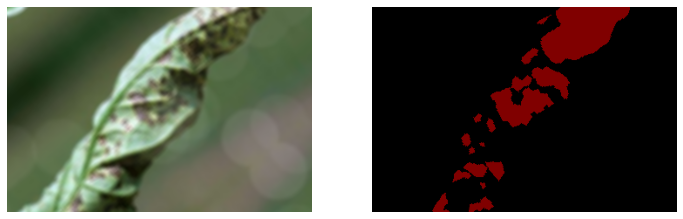

../input/leaf_disease_segmentation/orig_data/train_images/00003.jpg


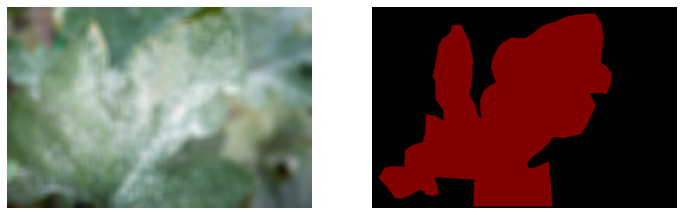

../input/leaf_disease_segmentation/orig_data/train_images/00004.jpg


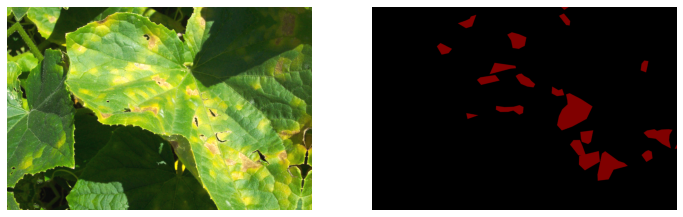

../input/leaf_disease_segmentation/orig_data/train_images/00005.jpg


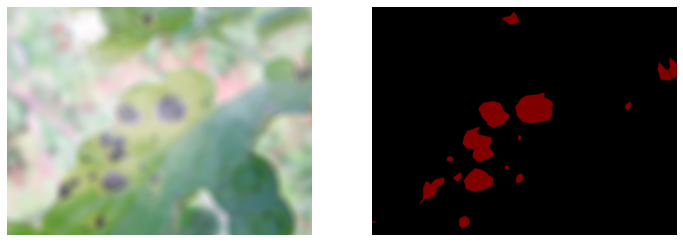

../input/leaf_disease_segmentation/orig_data/train_images/00006.jpg


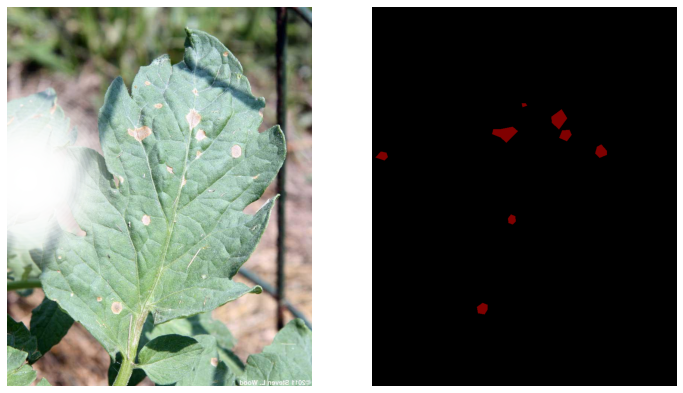

../input/leaf_disease_segmentation/orig_data/train_images/00008.jpg


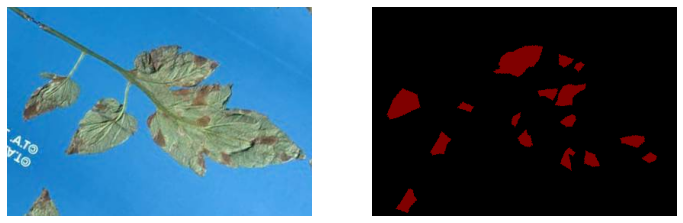

../input/leaf_disease_segmentation/orig_data/train_images/00010.jpg


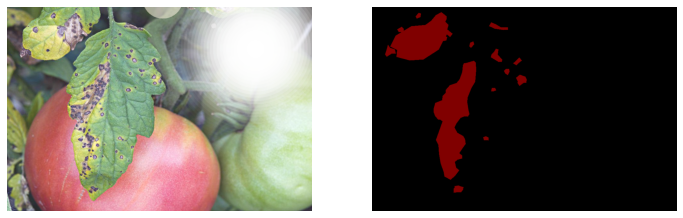

../input/leaf_disease_segmentation/orig_data/train_images/00011.jpg


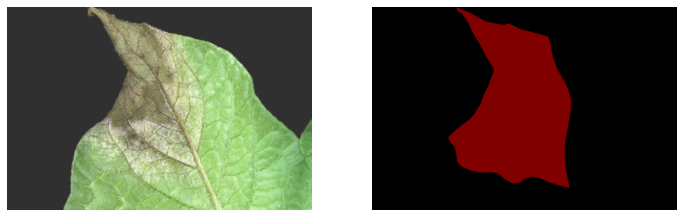

../input/leaf_disease_segmentation/orig_data/train_images/00012.jpg


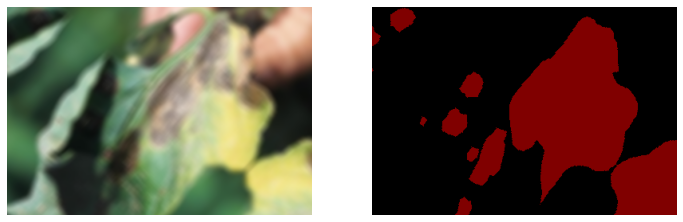

../input/leaf_disease_segmentation/orig_data/train_images/00013.jpg


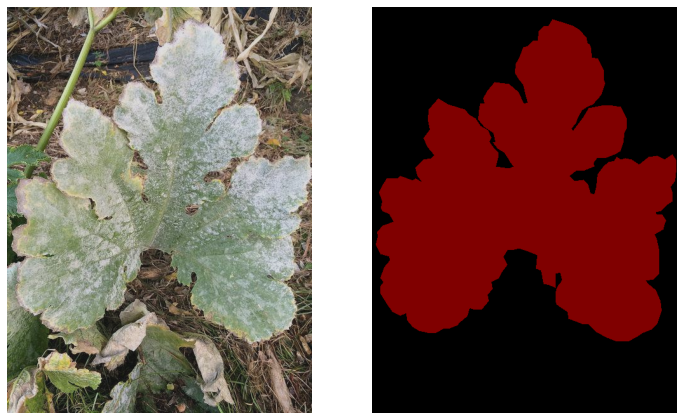

In [4]:
for i in range(10):
    print(train_images[i])
    image = np.array(Image.open(train_images[i]).convert('RGB'))
    mask = np.array(Image.open(train_masks[i]).convert('RGB'))
    
    transformed = train_image_transform(image=image, mask=mask)
    image = transformed['image']
    mask = transformed['mask']
    
    plt.figure(figsize=(12, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.axis('off')
    plt.show()